<a href="https://colab.research.google.com/github/Raghav-Gupta24/Customer-Footfall-Forecasting/blob/main/Time_Series_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Problem Statement
Given some data about customer footfall at a food chain ‘Xotica’, 

We need to forecast the number of visitors for upcoming 39 days (almost 6 weeks) using the number of visitors recorded within the past 1-1.5 years.

Importing basic libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.rcParams['figure.figsize'] = (20, 6)

Loading the dataset

In [3]:
!gdown 1WFZIkPnFCt08c4y2fSbWNaizhCncJBnw

Downloading...
From: https://drive.google.com/uc?id=1WFZIkPnFCt08c4y2fSbWNaizhCncJBnw
To: /content/customer_footfall.csv
100% 13.1k/13.1k [00:00<00:00, 30.5MB/s]


In [4]:
df = pd.read_csv('/content/customer_footfall.csv')
df.head()

,date,weekday,holiday,total
0,1/1/2016,Friday,1,296.0
1,1/2/2016,Saturday,0,191.0
2,1/3/2016,Sunday,0,202.0
3,1/4/2016,Monday,0,105.0
4,1/5/2016,Tuesday,0,98.0


### Understanding the data
This data is accustomed to American holidays as Xotica is a food chain based in the US.
- `date`: column containing the specific date
- `weekday`: column telling what day of the week it is
- `holiday`: binary encoded column, telling whether it was a holiday on the specific date (1) or not (0).
- `total`: target variable depicting the total number of visiters on the given day.

Note: The data is daily data.

In [5]:
df.shape

(517, 4)

In [6]:
df.isna().sum()

date        0
weekday     0
holiday     0
total      39
dtype: int64

The data set contains 517 days: 478 days of restaurant's data and 39 days of data which have Nan in total.

Our problem statement said to forecast for 39 days, so perhaps these NaN values are actually the last 39 values that are to be forecasted.

In [7]:
df.tail(45)

,date,weekday,holiday,total
472,4/17/2017,Monday,1,140.0
473,4/18/2017,Tuesday,0,91.0
474,4/19/2017,Wednesday,0,79.0
475,4/20/2017,Thursday,0,90.0
476,4/21/2017,Friday,0,165.0
477,4/22/2017,Saturday,0,226.0
478,4/23/2017,Sunday,0,NaN
479,4/24/2017,Monday,0,NaN
480,4/25/2017,Tuesday,0,NaN
481,4/26/2017,Wednesday,0,NaN


This confirms my suspicion.

Creating a copy of the original data so that in future, even after modifications on the data we won't have to read the csv again and again.

In [5]:
df1 = df.copy()

Dropping the NaN values from df, to create the training set of sorts.

In [6]:
df.dropna(inplace=True)

Chekcing the dtypes

In [10]:
df.dtypes

date        object
weekday     object
holiday      int64
total      float64
dtype: object

Since we're working on a forecasting problem, the date column must be of `datetime` dtype of `pandas`

Moreover, it should be the index.

In [7]:
df['date'] = pd.to_datetime(df['date'])
df.set_index('date',inplace = True)
df.head(5)

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0


In [12]:
df.shape

(478, 3)

Since we've dropped the last 39 rows, and since `date` is now the index.

In [13]:
df.describe()

,holiday,total
count,478.000000,478.000000
mean,0.066946,133.792887
std,0.250190,59.736116
min,0.000000,40.000000
25%,0.000000,86.000000
50%,0.000000,119.000000
75%,0.000000,176.750000
max,1.000000,316.000000


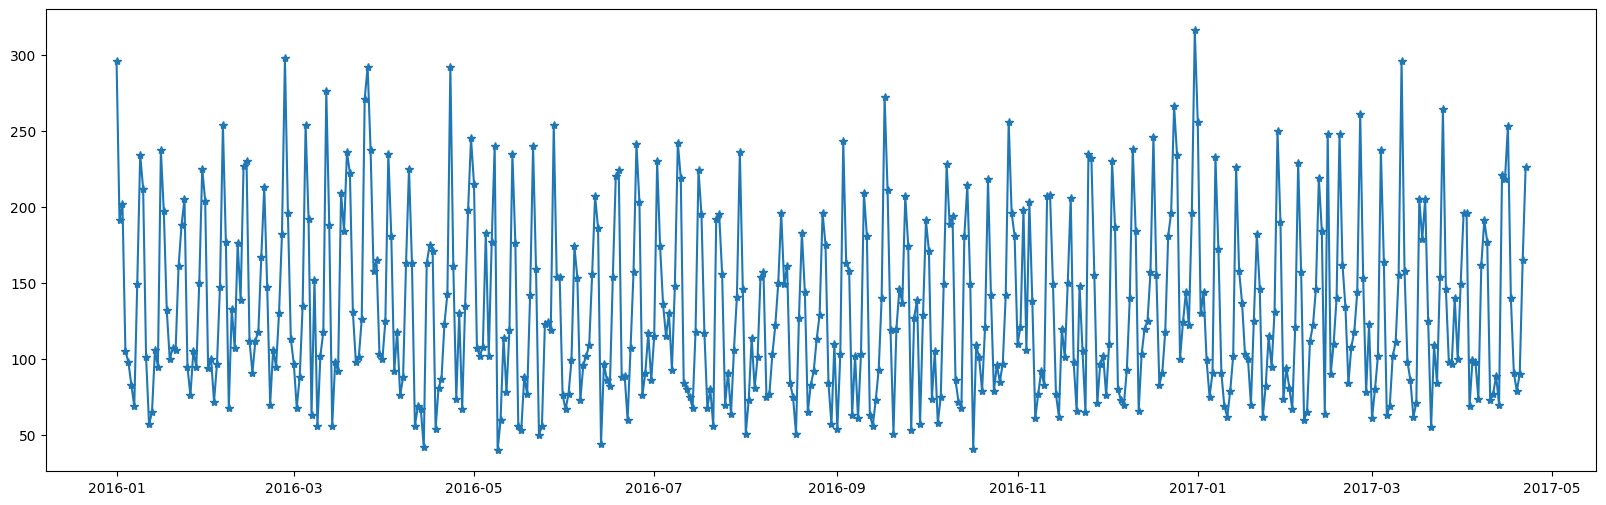

In [14]:
# Lets take a look at our time series plot
plt.plot(df.index, df['total'], '-*')
plt.show()

Obs:-
- We don't have any missing values
- There might be some anomlaies, need to check.

### Anomaly Check

[]

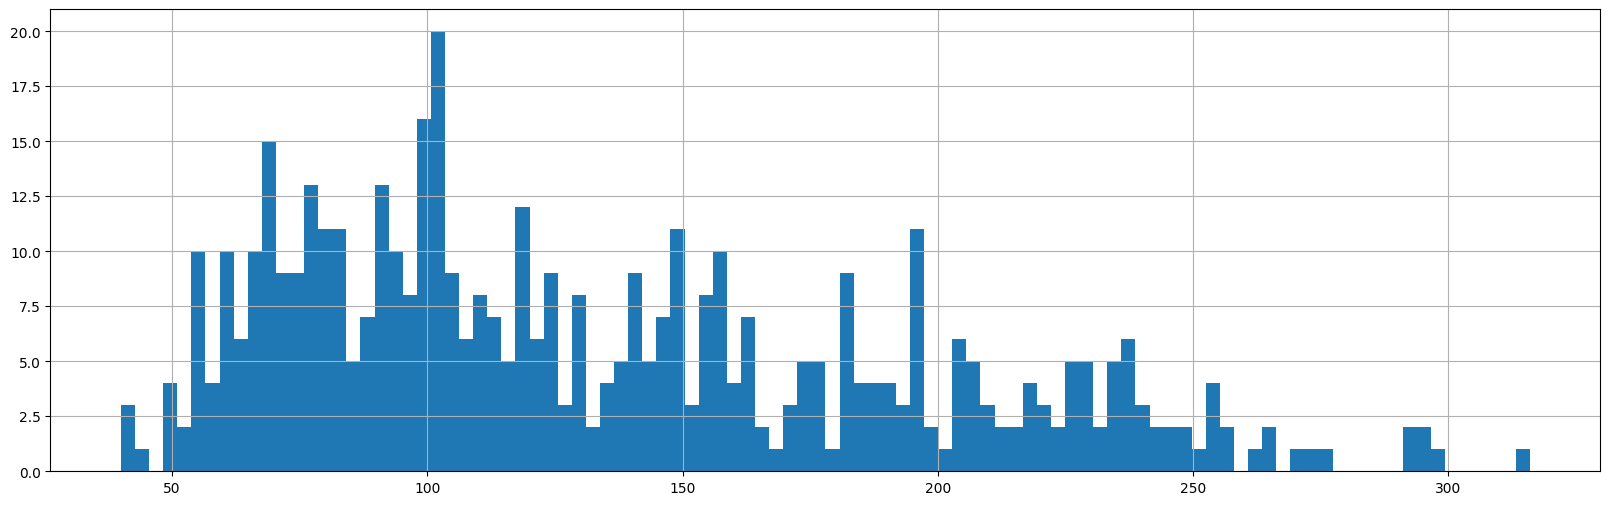

In [15]:
df.total.hist(bins=100).plot()

In [16]:
df.total.quantile(0.95)

242.14999999999998

In [17]:
df.total.quantile(0.98)

264.91999999999996

In [18]:
df.total.quantile(0.02)

53.54

In [19]:
df.total.quantile(0.99)

292.0

In [20]:
df.total.quantile(0.01)

50.77

In [21]:
# mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.95), lower=mobile_sales.Sales.quantile(0.05)).plot()

In [22]:
# mobile_sales.Sales = mobile_sales.Sales.clip(upper=mobile_sales.Sales.quantile(0.98), lower=mobile_sales.Sales.quantile(0.02))

### Finding Patterns

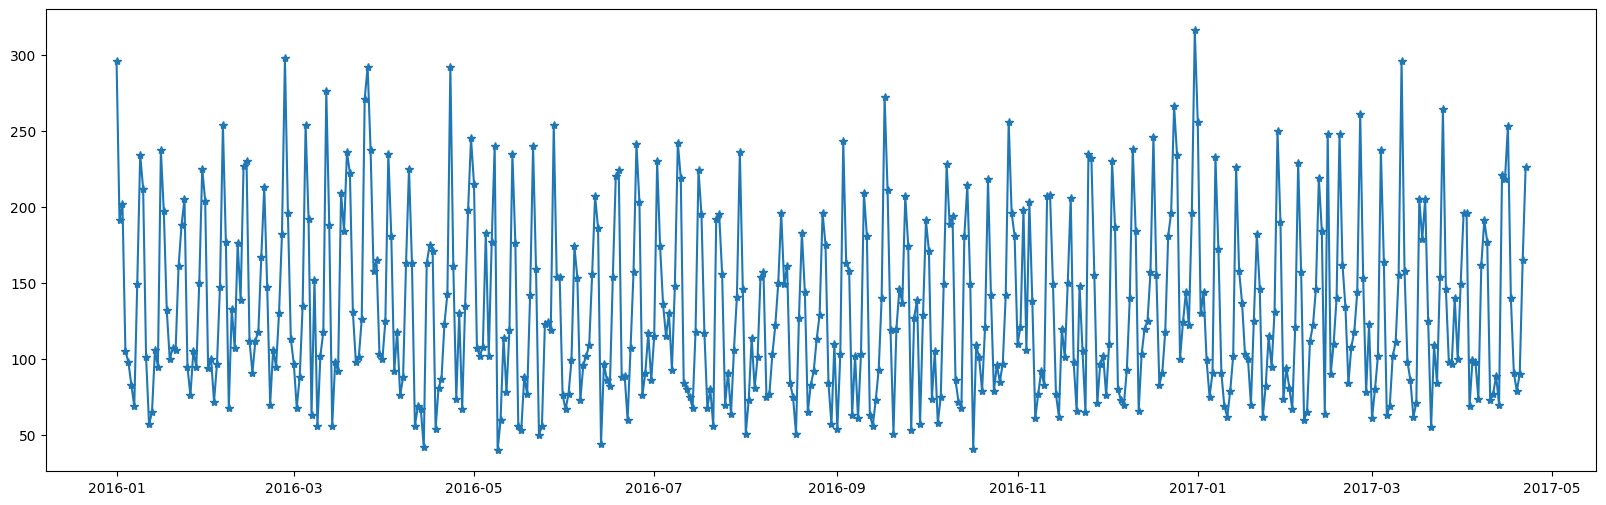

In [23]:
# Lets take a look at our time series plot
plt.plot(df.index, df['total'], '-*')
plt.show()

In the above plot, the peaks are visible, but we can't map those peaks to any particular days. 

Therefore decreasing the number of days to plot, to get more insights.

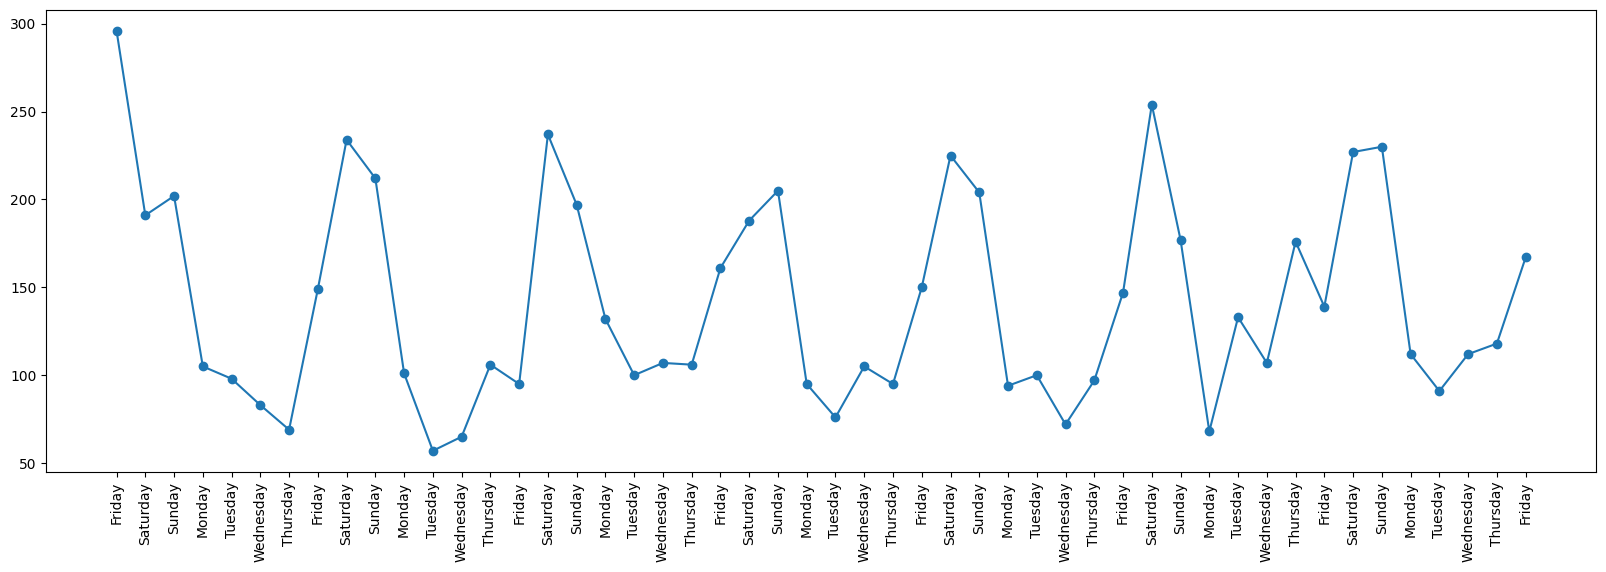

In [24]:
plt.plot(range(50),df['total'][:50], '-o')
plt.xticks(range(0,50), df['weekday'][:50],rotation = 90)
plt.show()

Obs:-
- There is a peak on weekends (saturday and Sunday)
- Even in wewkends, Sat tends to have more visitors, than Sunday.

Idea:-
- Basically, when people have an off, they tend to visit more.
- We have holidays data, let's include that in our plot.

In [25]:
df['holiday'].value_counts()

0    446
1     32
Name: holiday, dtype: int64

Lets take a look at our time series plot

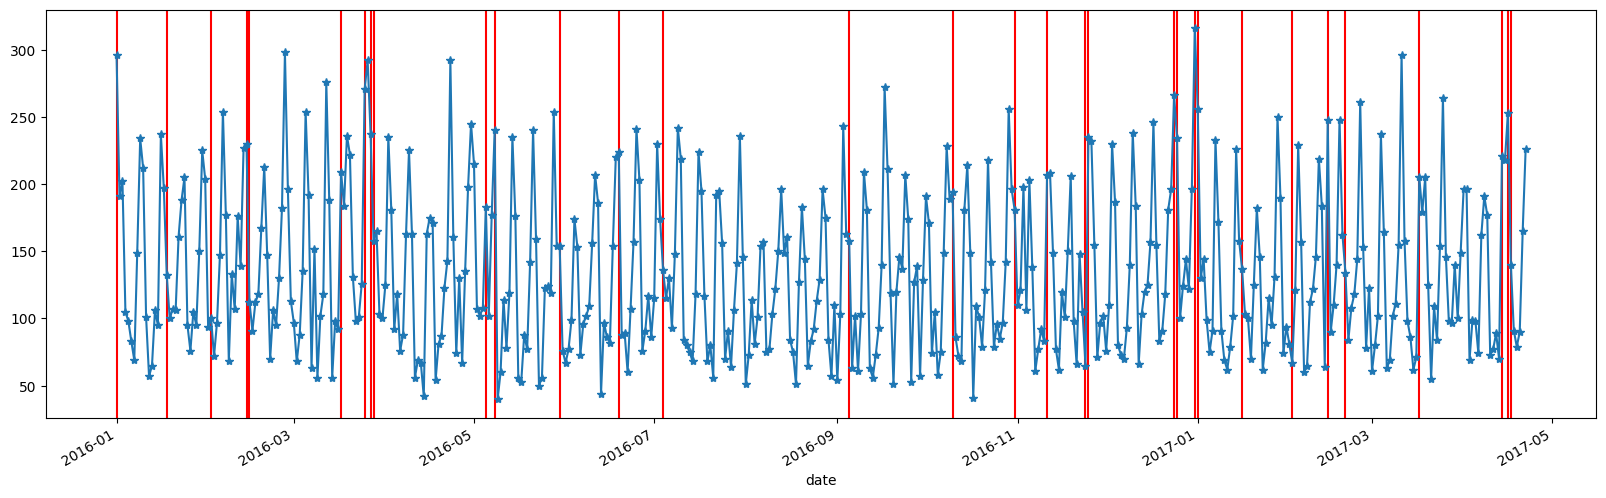

In [26]:
# Selecting days with holiday
holidays = df.loc[df.holiday==1].index

for hday in holidays:
    # .axvline: Adds a vertical line across the Axes; this will help in identifying holidays
    plt.axvline(x=hday, color='red')

df.total.plot(style='-*')
plt.show()

My suspicion was correct! Holdidays generally do accompany higher footfalls.

Now let's try to decompose the time series to see if it follows any pattern.

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose

<Figure size 2000x600 with 0 Axes>

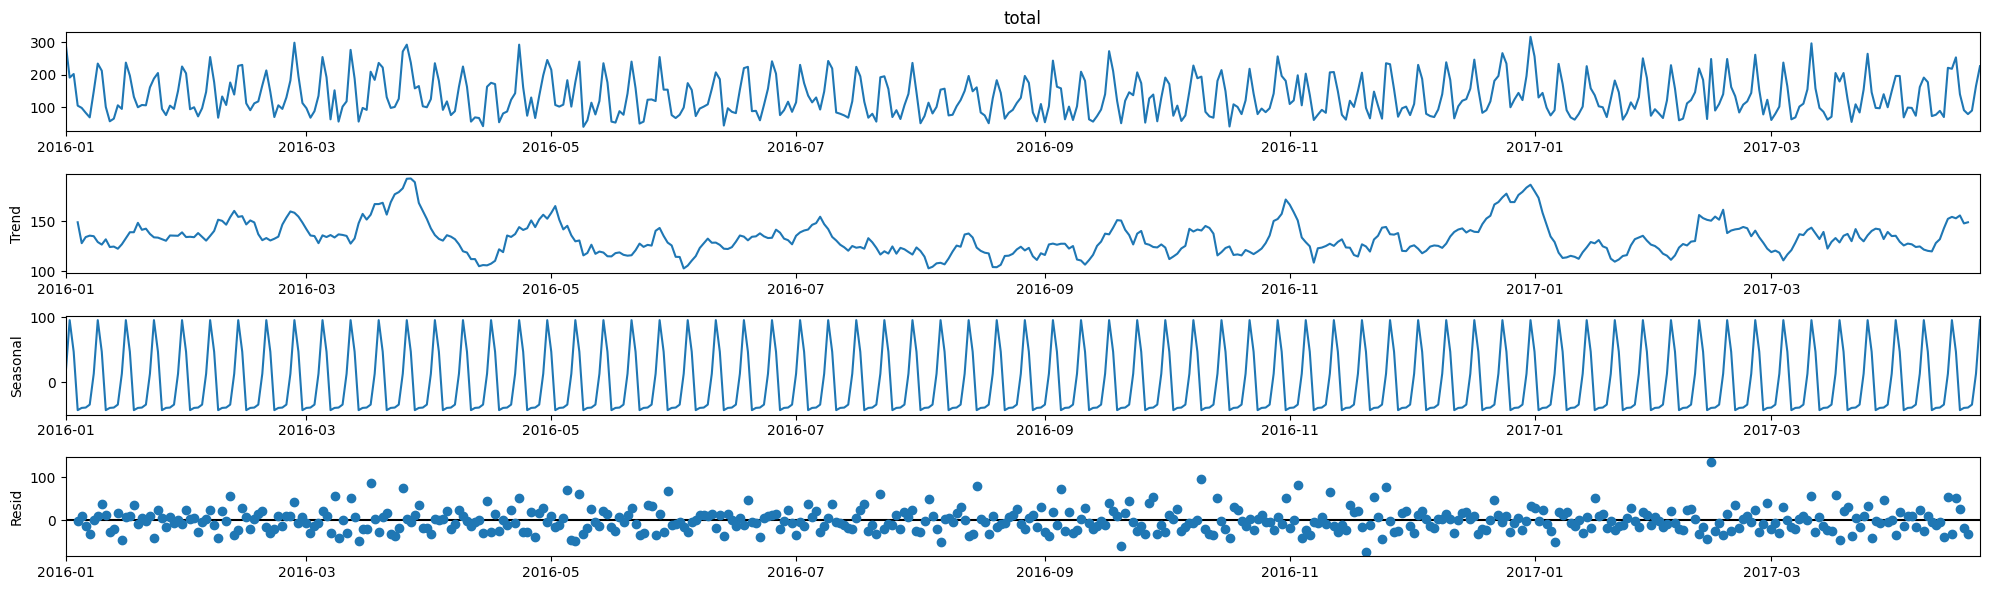

In [28]:
result = seasonal_decompose(df['total'], model='additive')

fig = plt.figure()  
fig = result.plot() 
# fig.set_size_inches(12, 9)
fig.show()

<Axes: xlabel='date'>

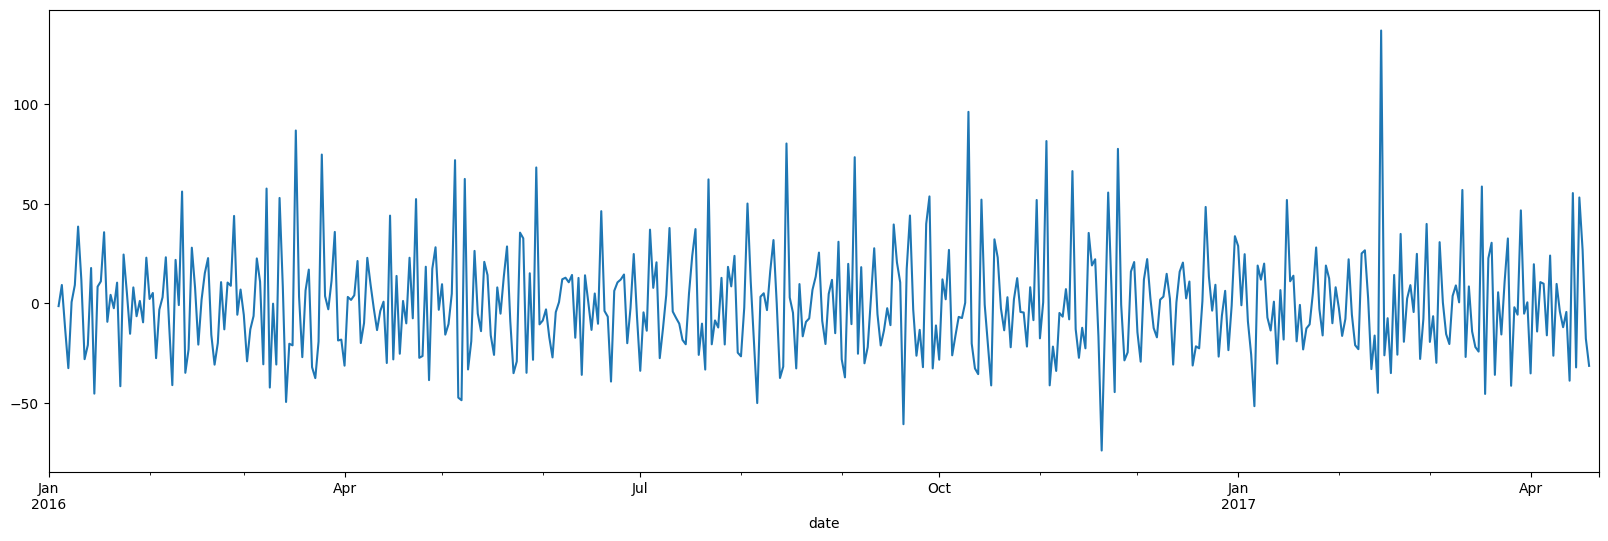

In [29]:
result.resid.plot()

Let's see the residual distribution if we consider the model to be multiplicative.

<Figure size 2000x600 with 0 Axes>

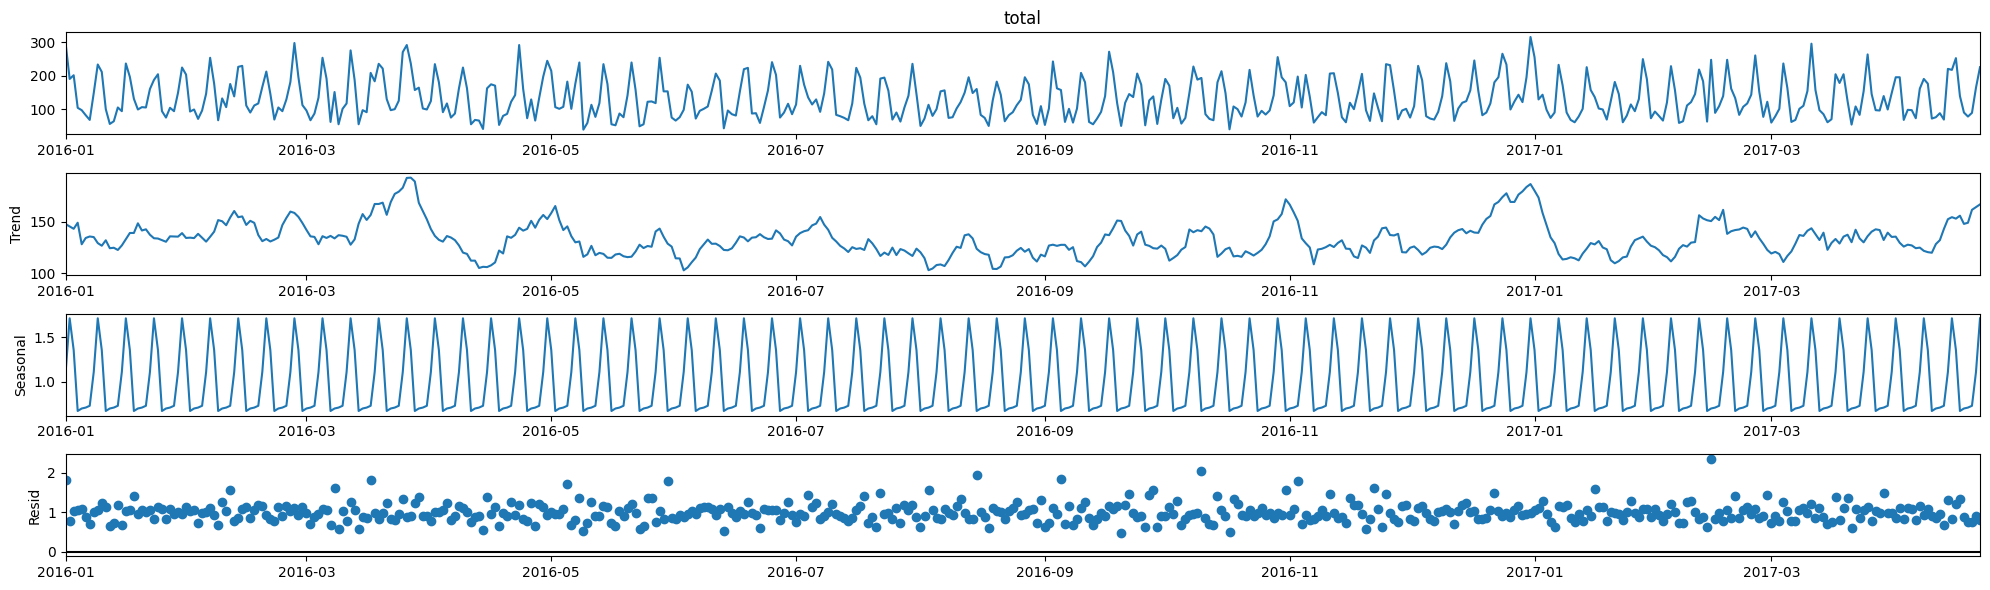

In [30]:
result = seasonal_decompose(df['total'], model='multiplicative', extrapolate_trend = 'freq')

fig = plt.figure()  
fig = result.plot() 
# fig.set_size_inches(12, 9)
fig.show()

`extrapolate_trend`: 
- trend line is found using Centered Moving Average, so some values at the start and end are missing. 
- Using this param, we can extrapolate these values, by either specifying the number of points to consider to take avg, or use `freq`

<Axes: xlabel='date'>

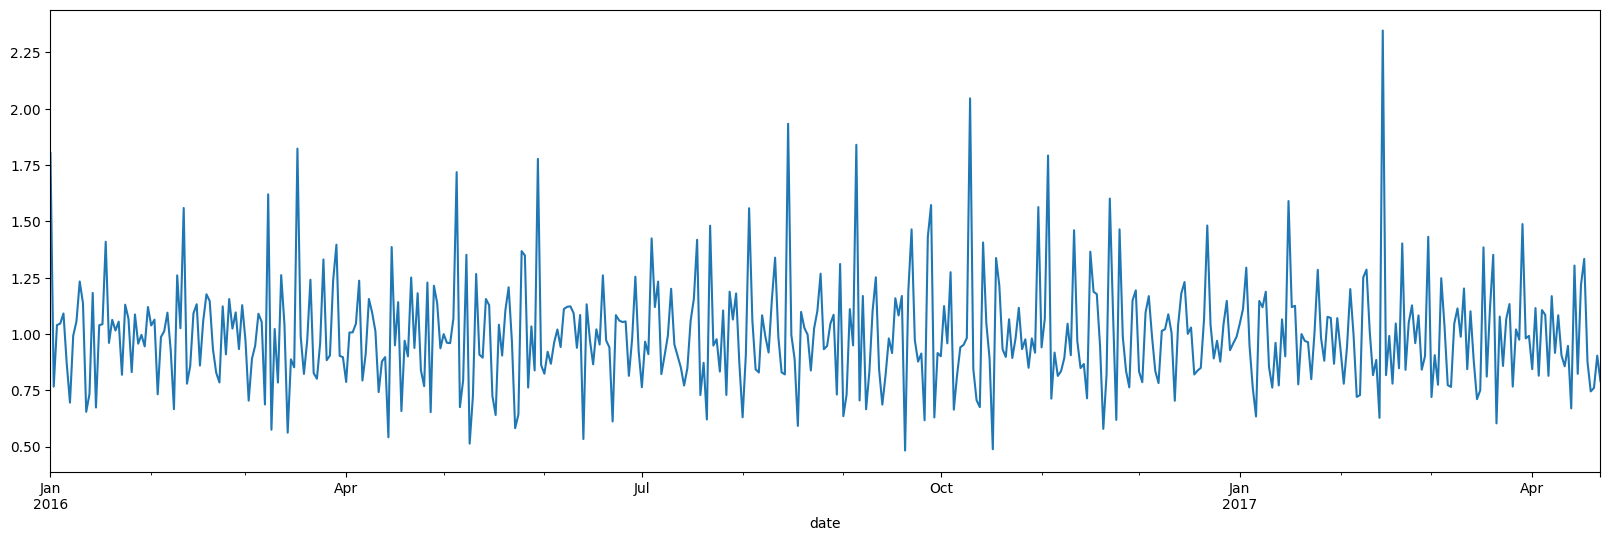

In [31]:
result.resid.plot()

<Axes: >

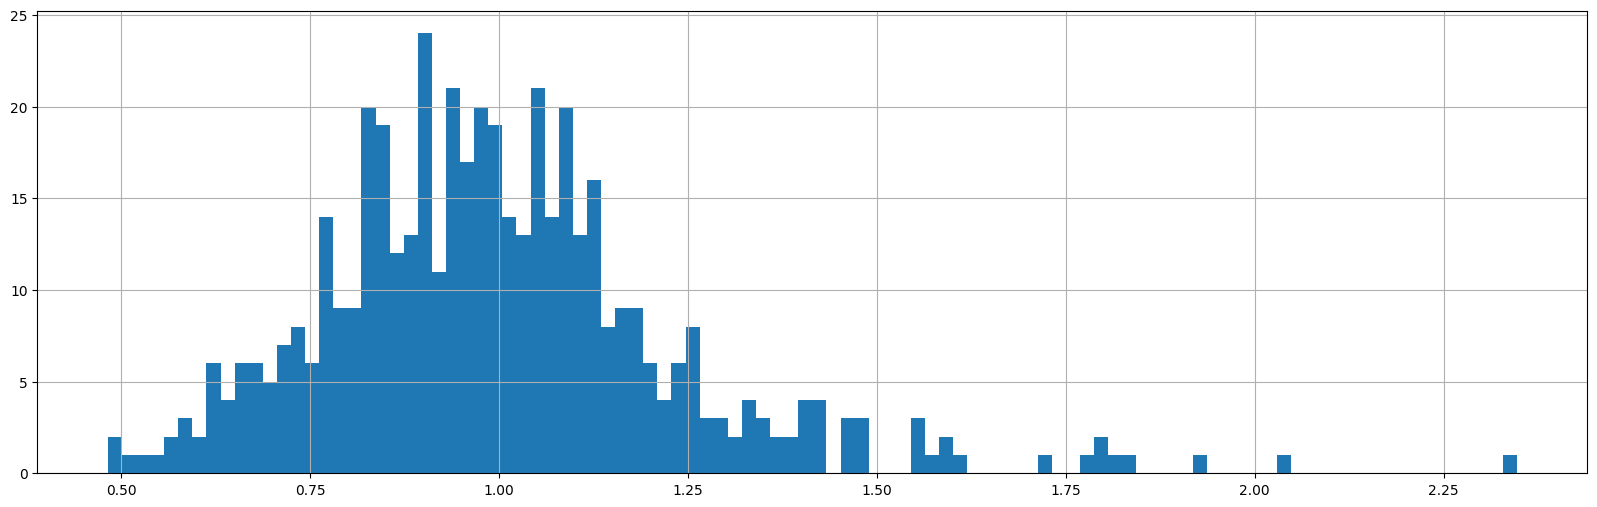

In [32]:
result.resid.hist(bins=100)

In [33]:
result.resid.mean()

0.9992936355708784

Though the residuals histogram does not look symmetric, it's mean is $≈1$

Whereas, the value of `total` (target variable) ranges between $[40, 316]$

Therefore I am considering the residuals to be close to 0, and therefore not forecasting the residuals further.

In [35]:
# from statsmodels.tsa.seasonal import seasonal_decompose
# result = seasonal_decompose(df['total'], model='multiplicative', freq = 30)
# fig = plt.figure()  
# fig = result.plot() 
# fig.set_size_inches(12, 9)
# fig.show()

From the above decomposition, it's visible that the data consists of seasonality and the trend is increasing and decreasing which is understandable as the number of visitors will increase during the weekends.

---

### Generating Baseline Forecasts.

#### Before that, we need to do train test split.

Since this is time series data, we cannot use `train_test_split()`.

In [36]:
df.shape

(478, 3)

In [ ]:
478*0.1

Considering a 90-10 split (since we do not have a lot of data), test data should have 48 datapoints.

In [ ]:
478-48

In [8]:
train = df.iloc[:430]
test = df.iloc[430:]

#### Creating a function for performance evaluation

In [9]:
from sklearn.metrics import (
    mean_squared_error as mse,
    mean_absolute_error as mae, 
    mean_absolute_percentage_error as mape
)

# Creating a function to print values of all these metrics.
def performance(actual, predicted):
    print('MAE :', round(mae(actual, predicted), 3))
    print('RMSE :', round(mse(actual, predicted)**0.5, 3)) 
    print('MAPE:', round(mape(actual, predicted), 3))

#### 1. Forecasting the mean

In [39]:
df['total'].mean()

133.7928870292887

In [40]:
test['pred'] = train['total'].mean()

<ipython-input-40-5935fa54c8c7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = train['total'].mean()


MAE : 51.918
RMSE : 60.55
MAPE: 0.457


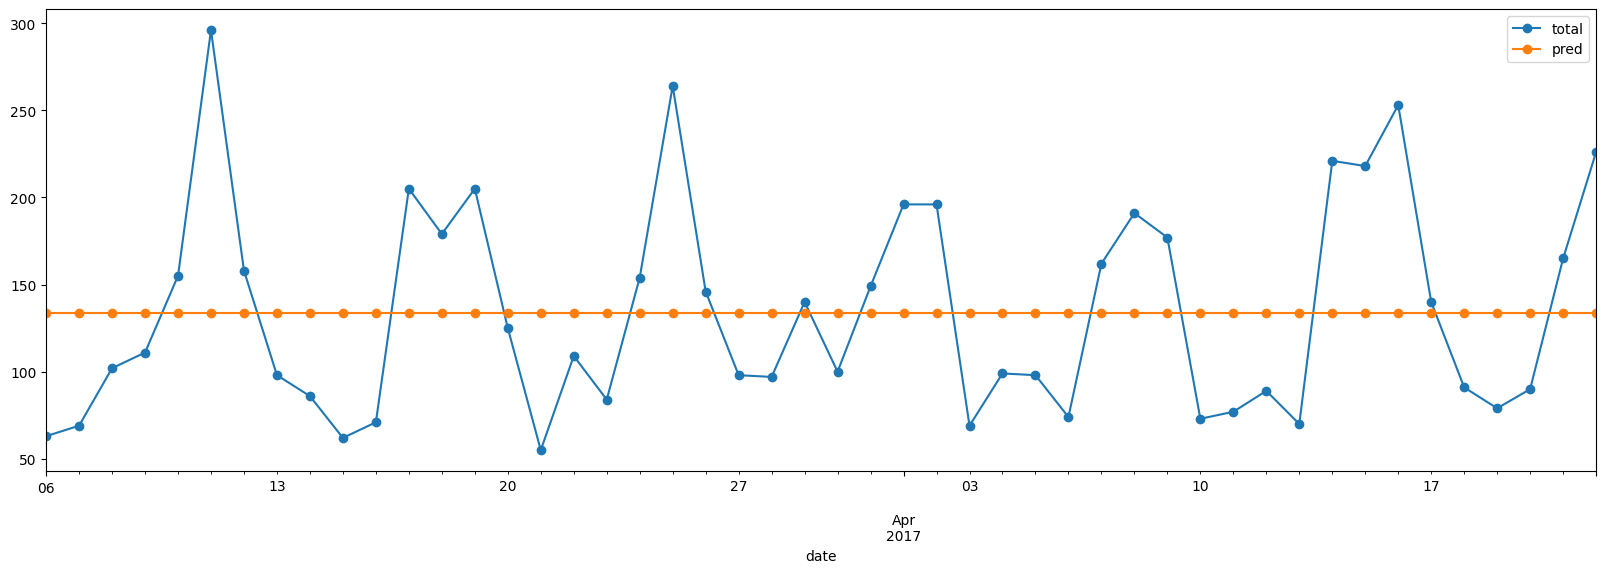

In [41]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

As per MAPE, we're getting 45.7% error

This is expected, this is not a very smart model.

#### 2. Seasonal Naive Forecast

Predicting the same value as observed in last season, i.e. last week.

In [ ]:
import datetime as dt

In [ ]:
for i in test.index:
  test.loc[i]['pred'] = train.loc[i - dt.timedelta(days=7)]['total']
test

In [ ]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

#### 3. Drift Method
Forecasting values along the trend slope.

In [ ]:
# Get the slope
y_t = train['total'][-1]
m = (y_t - train['total'][0]) / len(train)
h = np.linspace(0,len(test)-1, len(test))

test['pred'] = y_t + m * h

In [ ]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

### Smoothing based Forecasts.

#### 1. Moving Averages

In [44]:
train['total']

date
2016-01-01    296.0
2016-01-02    191.0
2016-01-03    202.0
2016-01-04    105.0
2016-01-05     98.0
              ...  
2017-03-01     61.0
2017-03-02     80.0
2017-03-03    102.0
2017-03-04    237.0
2017-03-05    164.0
Name: total, Length: 430, dtype: float64

In [57]:
def moving_average(n_datapoints):
  """
  n_datapoints: number of datapoints to take average of, to get new forecast
  """

  # Storing all non NaN values to a list, that can be traversed easily to compute avg
  pred = train.total.values

  l = len(test)
  for i in range(l):
    pred = np.append(pred, pred[-n_datapoints:].mean())

  return pred[-l:].round(1)

In [58]:
test['pred'] = moving_average(n_datapoints=3)


<ipython-input-58-5a282cef21bf>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = moving_average(n_datapoints=3)


In [63]:
# test.tail(45)

Similarly, we can try for a different values of `n_datapoints`

In [62]:
for i in [3, 5, 7, 10]:
  test['pred'] = moving_average(n_datapoints=i)
  
  print("n_datapoints = ", i)
  performance(test['total'], test['pred'])
  print("__________________________")

n_datapoints =  3
MAE : 65.342
RMSE : 74.815
MAPE: 0.7
__________________________
n_datapoints =  5
MAE : 54.792
RMSE : 62.997
MAPE: 0.538
__________________________
n_datapoints =  7
MAE : 50.919
RMSE : 59.165
MAPE: 0.464
__________________________
n_datapoints =  10
MAE : 52.644
RMSE : 61.442
MAPE: 0.476
__________________________


<ipython-input-62-84e676b8ef13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = moving_average(n_datapoints=i)
<ipython-input-62-84e676b8ef13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = moving_average(n_datapoints=i)
<ipython-input-62-84e676b8ef13>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-doc

Therefore the Moving Average gives best performance with `n_datapoints = 7`

<ipython-input-64-a35989133d14>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = moving_average(n_datapoints=7)


<Axes: xlabel='date'>

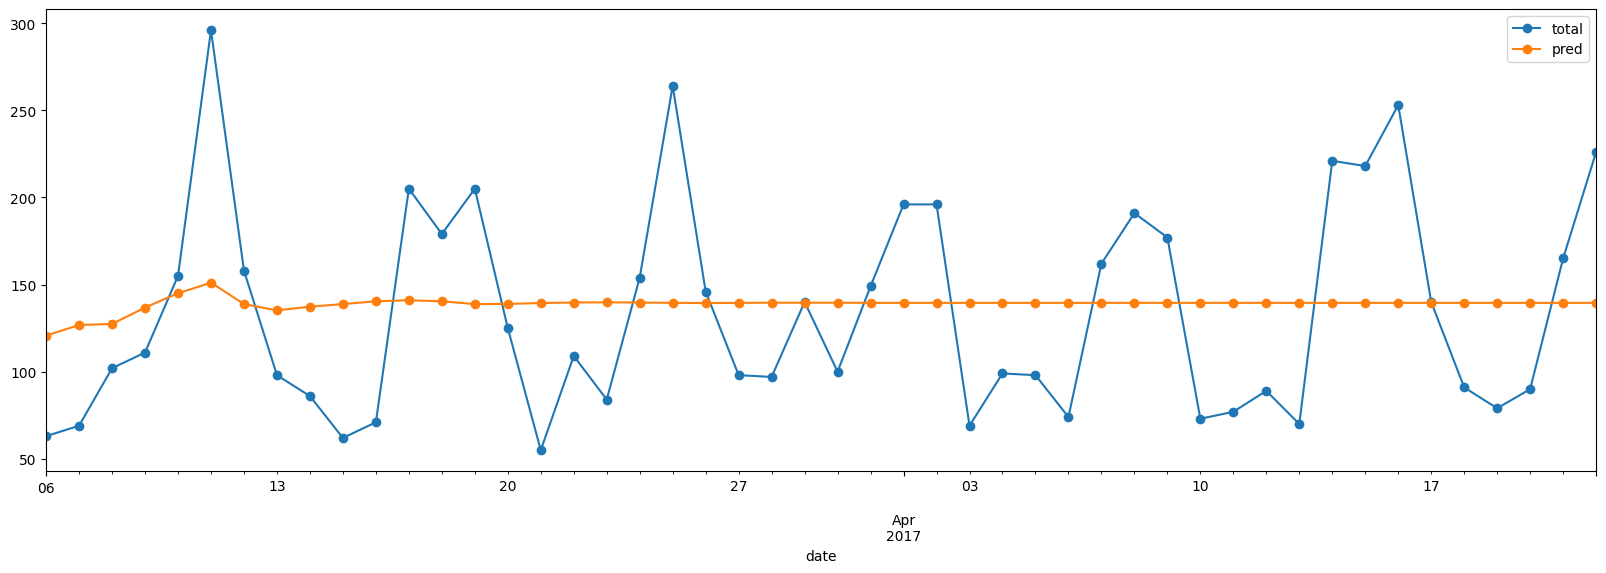

In [64]:
test['pred'] = moving_average(n_datapoints=7)

test.plot(y=['total', 'pred'], style='-o')

#### 2. Simple Exponential Smoothing.

In [65]:
import statsmodels.api as sm

The recommended smoothing_level = $\frac{1}{2*seasonality}$

In [68]:
model = sm.tsa.SimpleExpSmoothing(train.total).fit(smoothing_level=1/(2*7))
test['pred'] = model.forecast(steps = len(test)).round(1)
# test

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-68-0039a100c581>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model.forecast(steps = len(test)).round(1)


MAE : 52.212
RMSE : 60.636
MAPE: 0.471


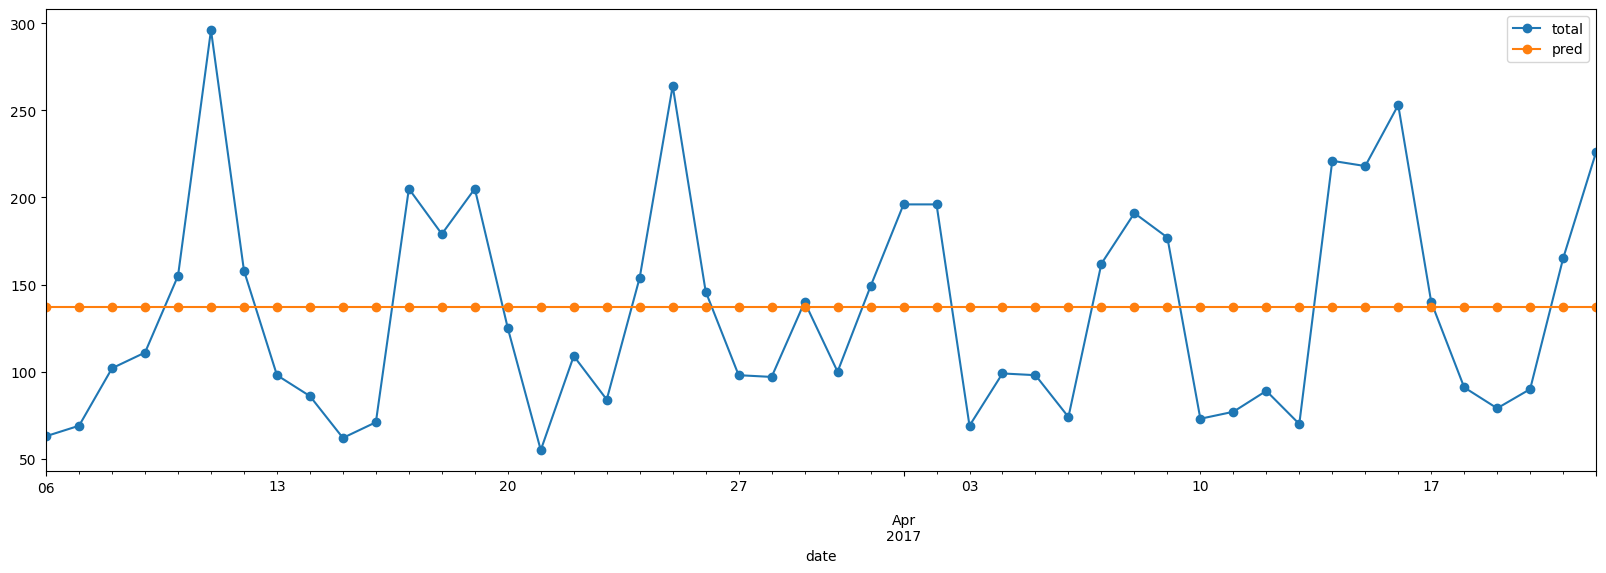

In [69]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

This is a very bad model!

Let's try adding trend and seasonality components (Holt and Hold-Winter Method respectively)

#### 3. Double Exponential Smoothing (Holt Method)

In [79]:
model = sm.tsa.ExponentialSmoothing(train.total, trend='add').fit(smoothing_level=1/(2*7))
# model = sm.tsa.ExponentialSmoothing(train.total, trend='mul').fit(smoothing_level=1/(2*7))

test['pred'] = model.forecast(steps = len(test)).round(1)
# test

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/holtwinters/model.py:83: RuntimeWarning: overflow encountered in matmul
  return err.T @ err
<ipython-input-79-8e523c664cc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model.forecast(steps = len(test)).round(1)


MAE : 52.14
RMSE : 60.661
MAPE: 0.463


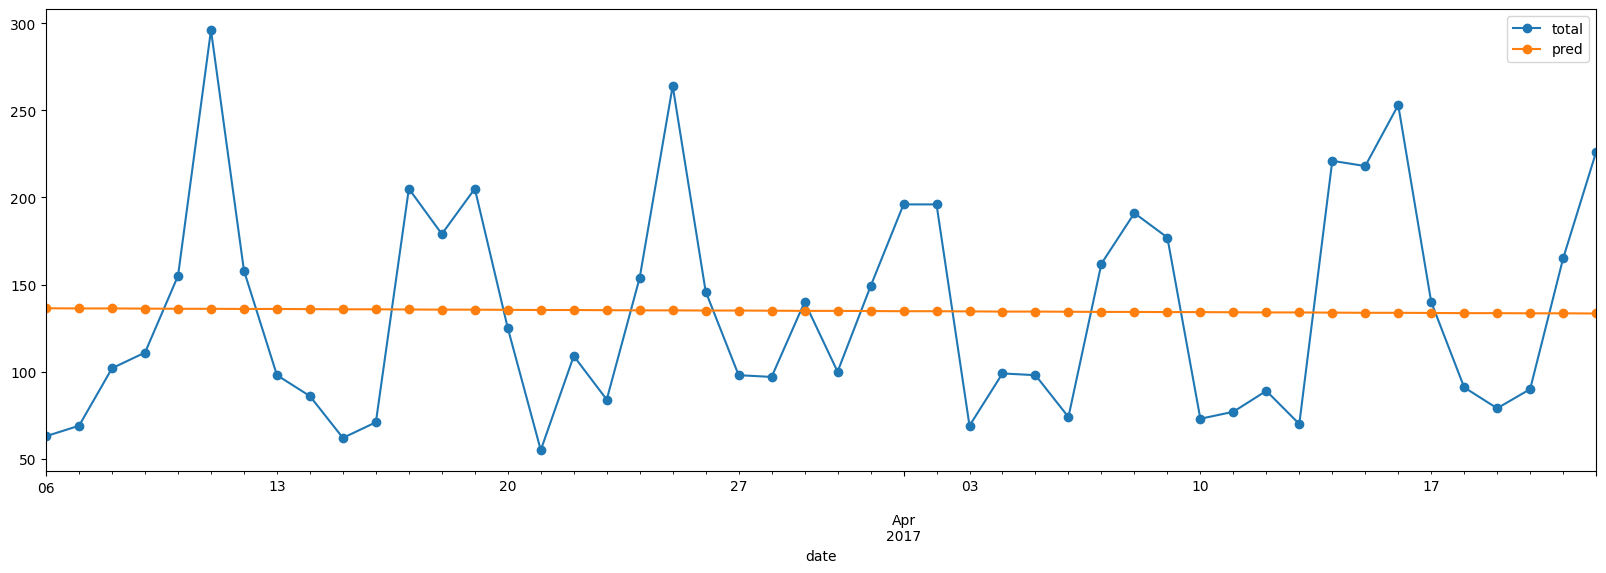

In [80]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

This is the same as Simple Exponential model.

That makes sense also, because as we saw in the seasonl decomposition, the trend of this TS is largely constant.

#### 4. Triple Exponential Smoothing (Holt - Winter's Mthod)

In [81]:
model = sm.tsa.ExponentialSmoothing(train.total, trend='add', seasonal='mul').fit(smoothing_level=1/(2*7))
test['pred'] = model.forecast(steps = len(test)).round(1)
# test

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-81-77efeae39971>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model.forecast(steps = len(test)).round(1)


MAE : 24.544
RMSE : 31.765
MAPE: 0.198


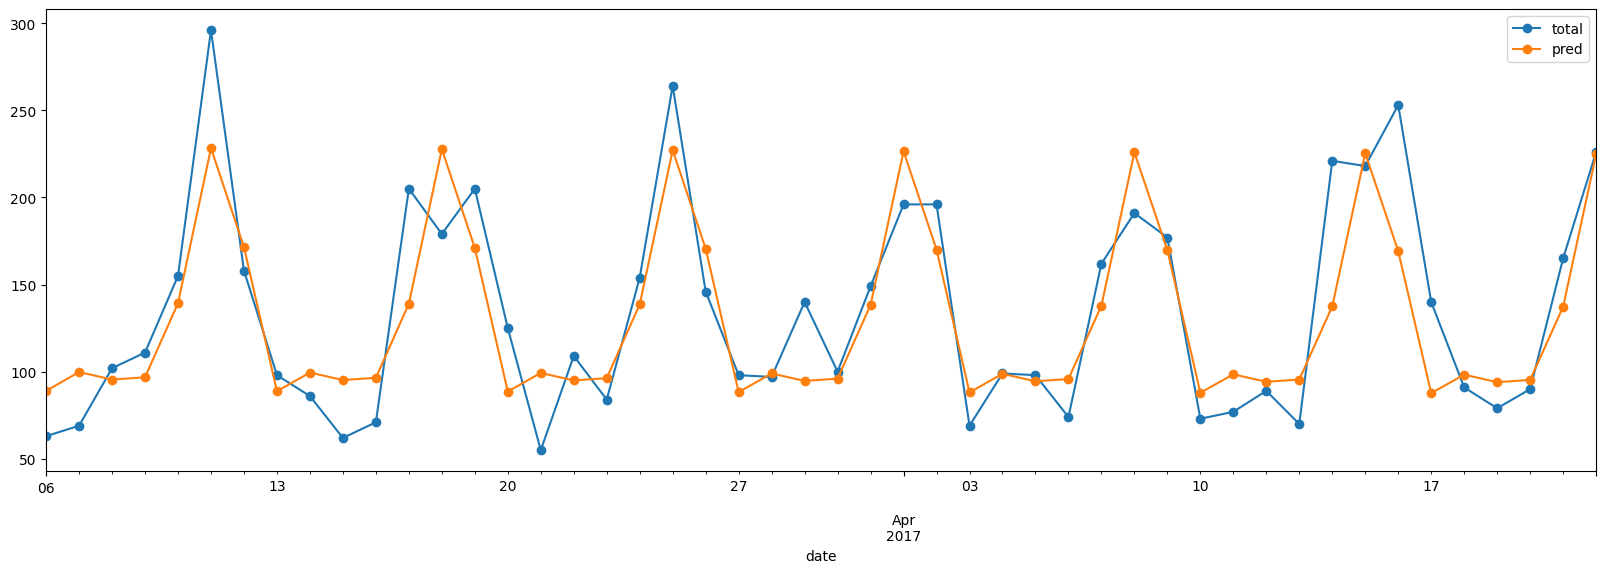

In [82]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

Clearly this is a very good model, as it captures trend and seasonality, also it minimises the error.

Let's try and compare the performances of ARIMA Family of forecasting methods.

### ARIMA Family forecasts.

In order to use these models, we first need to make our time series is **stationary**, by de-trending and de-seasonalising it.

In [99]:
# Dickey-Fuller test to check if TS is stationary or not
def adf_test(dataset):
   pvalue = sm.tsa.stattools.adfuller(dataset)[1] 
   print(pvalue)
   if pvalue <= 0.05:
      print('Sequence is stationary')
   else:
      print('Sequence is not stationary')

In [100]:
adf_test(train.total)

4.445439304979438e-06
Sequence is stationary


In [101]:
train_st = train['total'].diff(7).diff(1)
adf_test(train_st.dropna())

1.443061583119281e-14
Sequence is stationary


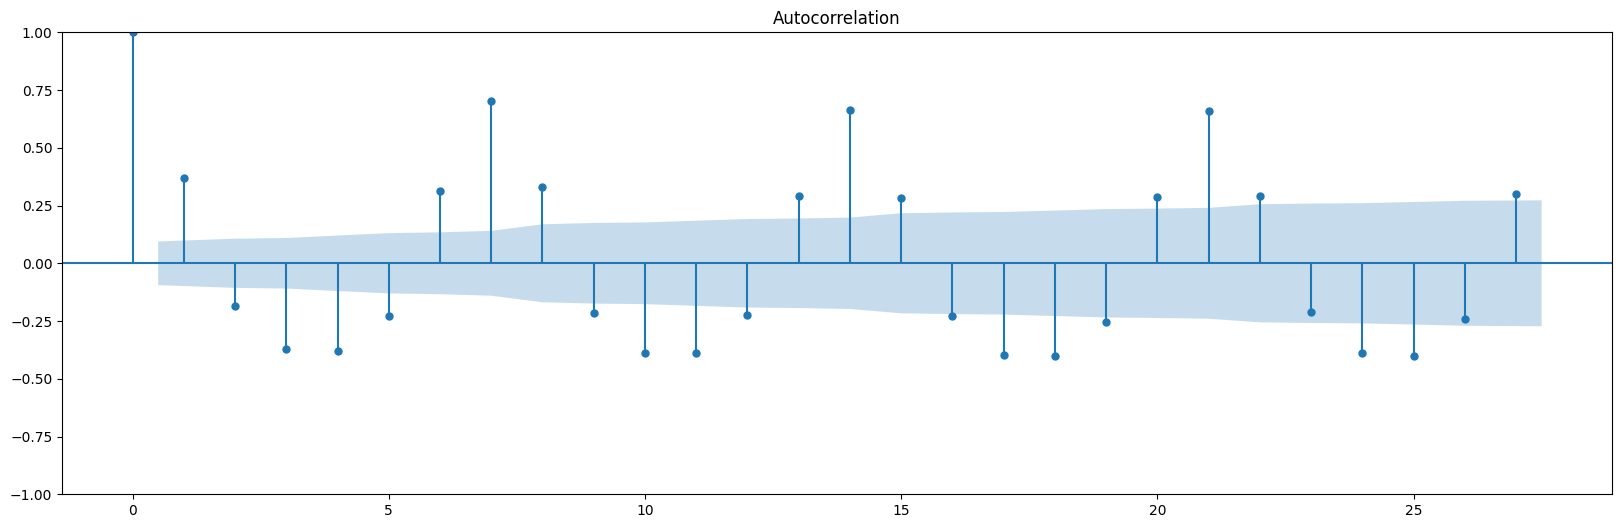

In [98]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(train.total);

/usr/local/lib/python3.9/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


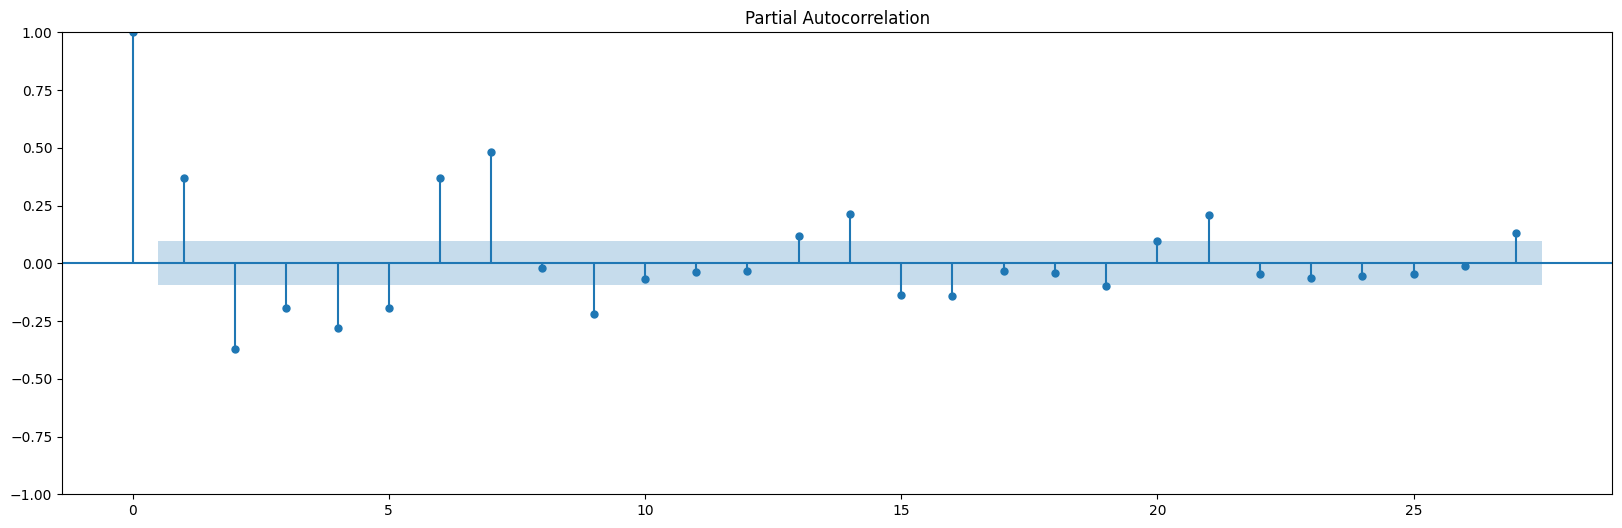

In [102]:
plot_pacf(train.total);

As expected, we can very clearly see that there is weekly seasonality.

#### 1. AR model.

In [10]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [111]:
model = SARIMAX(train.total, order=(3, 0, 0)) 
model = model.fit(disp=False)
test['pred'] = model.forecast(steps=len(test))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-111-8c1639219584>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model.forecast(steps=len(test))


In [ ]:
# Integrate !!

# test_x['pred'] = test_x['pred'].cumsum() + train_x.Sales[-1]

MAE : 92.28
RMSE : 111.706
MAPE: 0.644


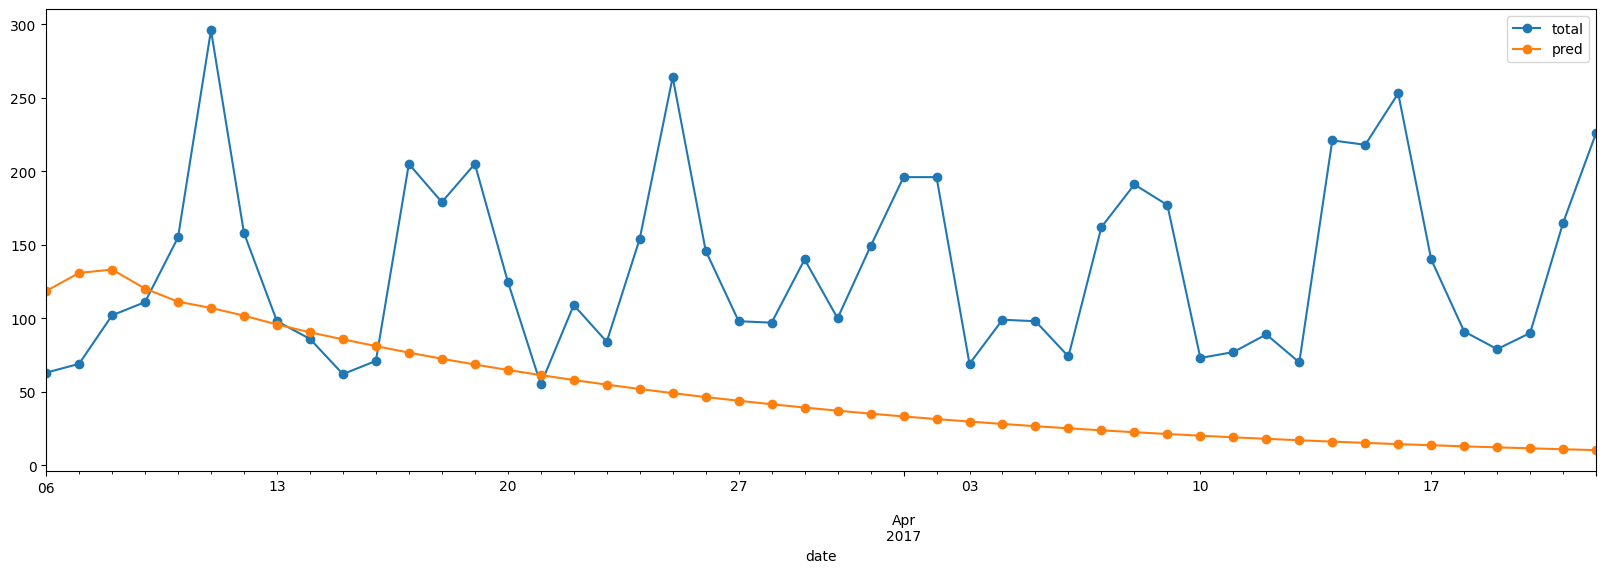

In [112]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

#### 2. Moving Average (MA)

In [125]:
model = SARIMAX(train.total, order=(0, 0, 3)) 
model = model.fit(disp=False)
test['pred'] = model.forecast(steps=len(test))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
<ipython-input-125-0296f9aab029>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model.forecast(steps=len(test))


MAE : 133.445
RMSE : 146.852
MAPE: 0.991


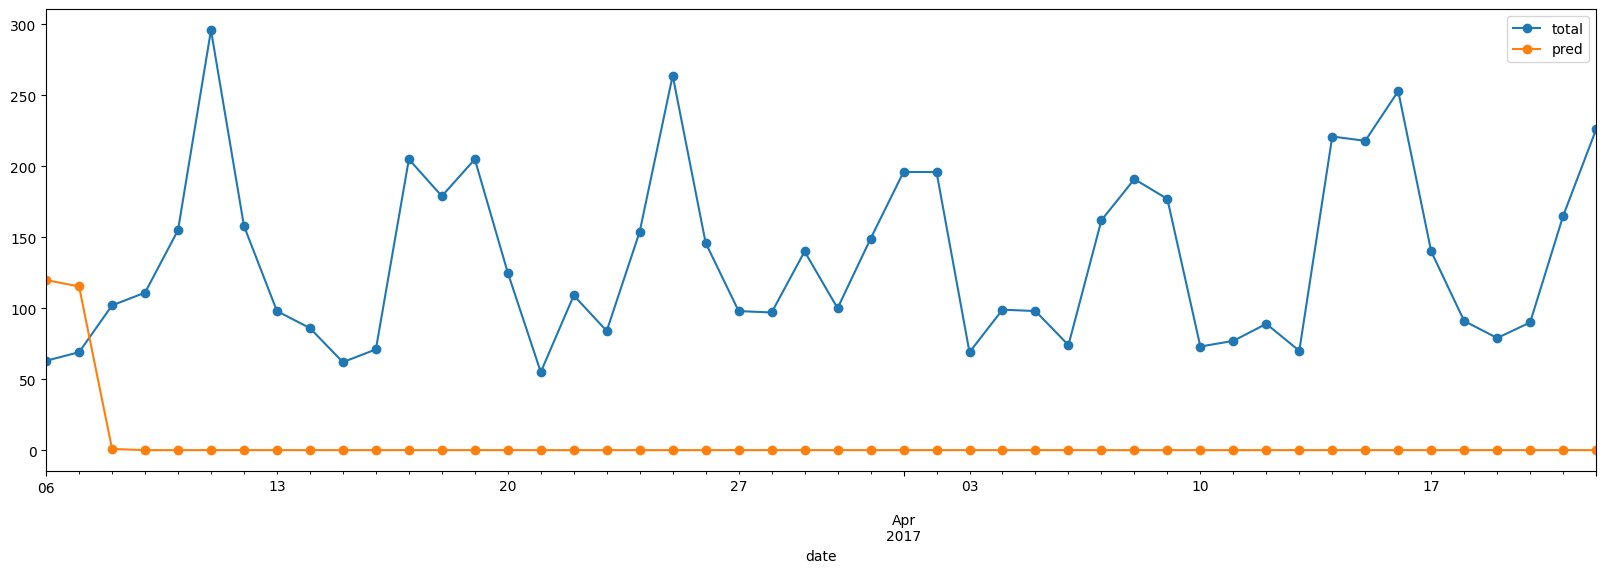

In [126]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

MA model is giving very bad results for `q = 1, 2, 3`


#### 3. ARMA

In [127]:
model = SARIMAX(train.total, order=(3, 0, 3)) 
model = model.fit(disp=False)
test['pred'] = model.forecast(steps=len(test))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-127-524e868e5346>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_

MAE : 51.538
RMSE : 60.035
MAPE: 0.448


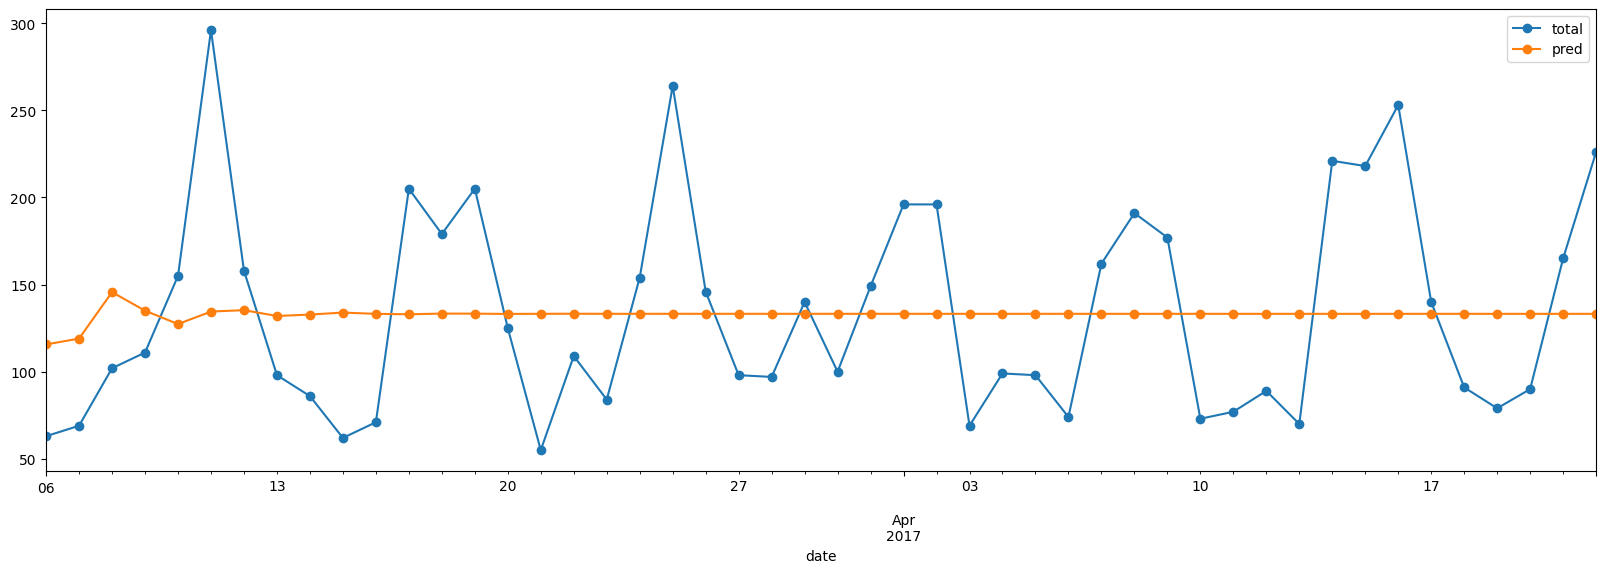

In [128]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

#### 4. ARIMA

In [20]:
model = SARIMAX(train['total'], order=(3, 1, 3), freq='D') 
model = model.fit(disp=False)
test['pred'] = model.forecast(steps=len(test))

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-20-4d3611ab4b4e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model.forecast(steps=len(test))


MAE : 26.695
RMSE : 34.81
MAPE: 0.235


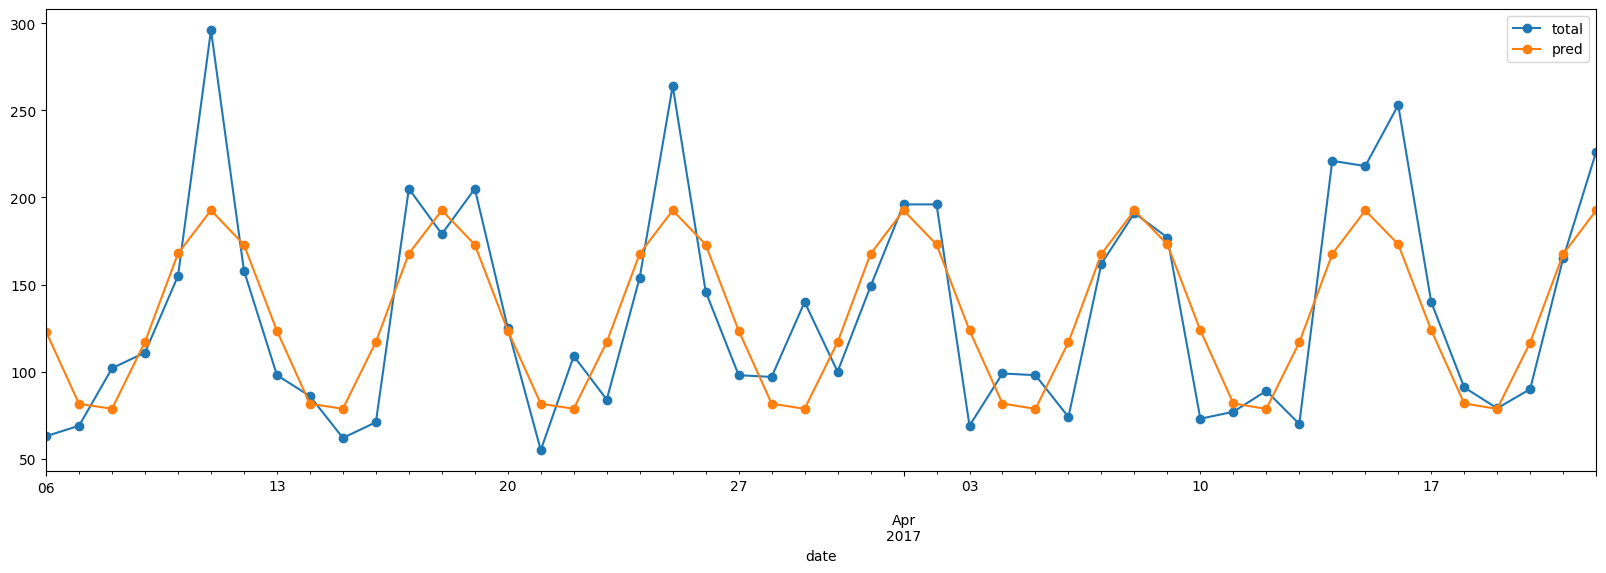

In [130]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

#### 5. SARIMA

Now we have 7 hyperparams to tune, so let's use GridSearch CV

Reference: https://towardsdatascience.com/grid-search-for-sarimax-parameters-adbd5104cb8b

In [131]:
import itertools

In [132]:
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
# Note: here we have 7 in the 's' position as we have monthly data
# You'll want to change this according to your time series' frequency
pdqs = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [142]:
### Run Grid Search ###
# WARNING: Took 20 mins to run

def sarimax_gridsearch(ts, pdq, pdqs, maxiter=50, freq='D'):
    '''
    Input: 
        ts : your time series data
        pdq : ARIMA combinations from above
        pdqs : seasonal ARIMA combinations from above
        maxiter : number of iterations, increase if your model isn't converging
        frequency : default='M' for month. Change to suit your time series frequency
            e.g. 'D' for day, 'H' for hour, 'Y' for year. 
        
    Return:
        Prints out top 5 parameter combinations
        Returns dataframe of parameter combinations ranked by BIC
    '''

    # Run a grid search with pdq and seasonal pdq parameters and get the best BIC value
    ans = []
    for comb in pdq:
        for combs in pdqs:
            try:
                mod = sm.tsa.statespace.SARIMAX(ts, # this is your time series you will input
                                                order=comb,
                                                seasonal_order=combs,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False,
                                                freq=freq)

                output = mod.fit(maxiter=maxiter) 
                ans.append([comb, combs, output.bic])
                # print('SARIMAX {} x {}7 : BIC Calculated ={}'.format(comb, combs, output.bic))
            except:
                continue
            
    # Find the parameters with minimal BIC value

    # Convert into dataframe
    ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'bic'])

    # Sort and return top 5 combinations
    ans_df = ans_df.sort_values(by=['bic'],ascending=True)[0:5]
    
    return ans_df

In [143]:
sarimax_gridsearch(train.total, pdq, pdqs, freq='D')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, f

,pdq,pdqs,bic
305,"(1, 0, 2)","(0, 2, 2, 7)",3986.866204
62,"(0, 0, 2)","(0, 2, 2, 7)",3988.283063
143,"(0, 1, 2)","(0, 2, 2, 7)",3989.232461
314,"(1, 0, 2)","(1, 2, 2, 7)",3992.193207
548,"(2, 0, 2)","(0, 2, 2, 7)",3992.926222


Checking for all these 5 different combinations, here are the performance results:-
```
MAE : 26.056
RMSE : 34.168
MAPE: 0.203

MAE : 26.228
RMSE : 34.137
MAPE: 0.206

MAE : 26.699
RMSE : 33.457
MAPE: 0.219

MAE : 26.005
RMSE : 34.148
MAPE: 0.202

MAE : 26.421
RMSE : 34.237
MAPE: 0.208
```

Therefore, will user `order = (1, 0, 2)` and `seasonal_order = (1, 2, 2, 7)`

In [65]:
model = SARIMAX(train.total, order=(1, 0, 2), seasonal_order=(1, 2, 2, 7), freq='D') 
model = model.fit(disp=False)
test['pred'] = model.forecast(steps=len(test))

performance(test['total'], test['pred'])

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


MAE : 26.005
RMSE : 34.148
MAPE: 0.202


/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
<ipython-input-65-fb1da31163b4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = model.forecast(steps=len(test))


MAE : 26.005
RMSE : 34.148
MAPE: 0.202


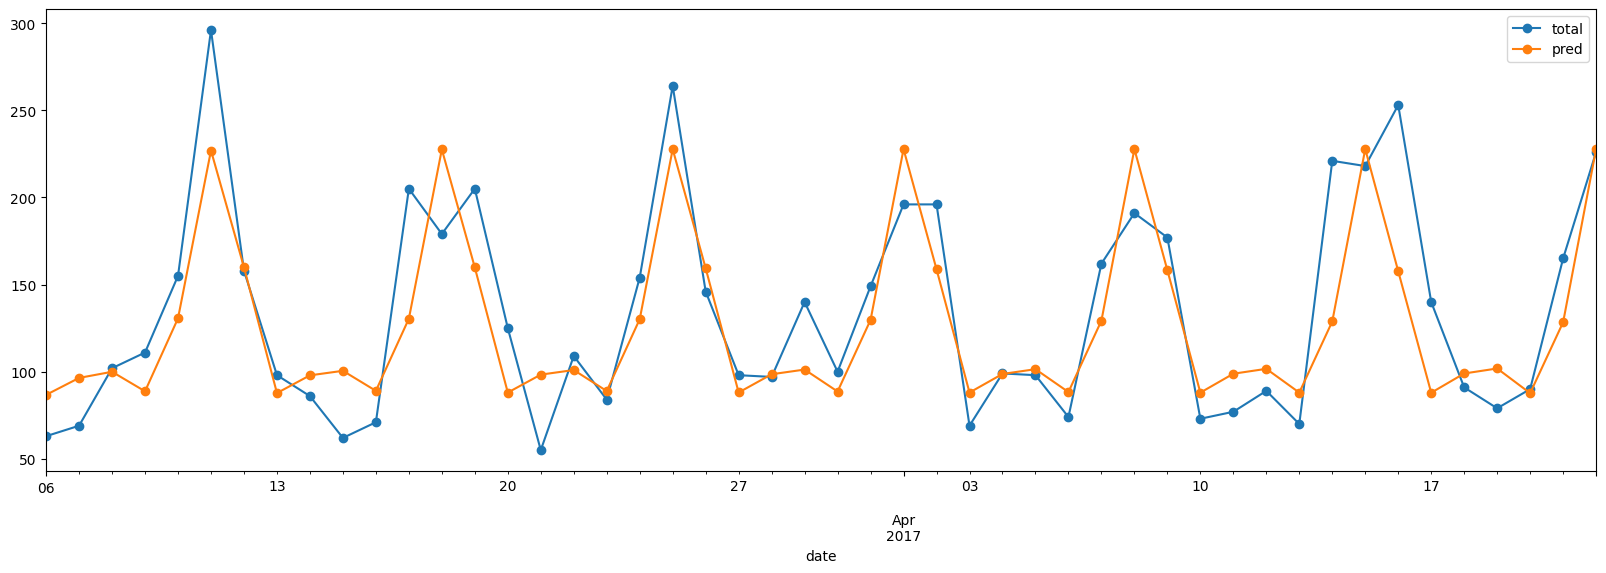

In [66]:
test.plot(y=['total', 'pred'], style='-o')

performance(test['total'], test['pred'])

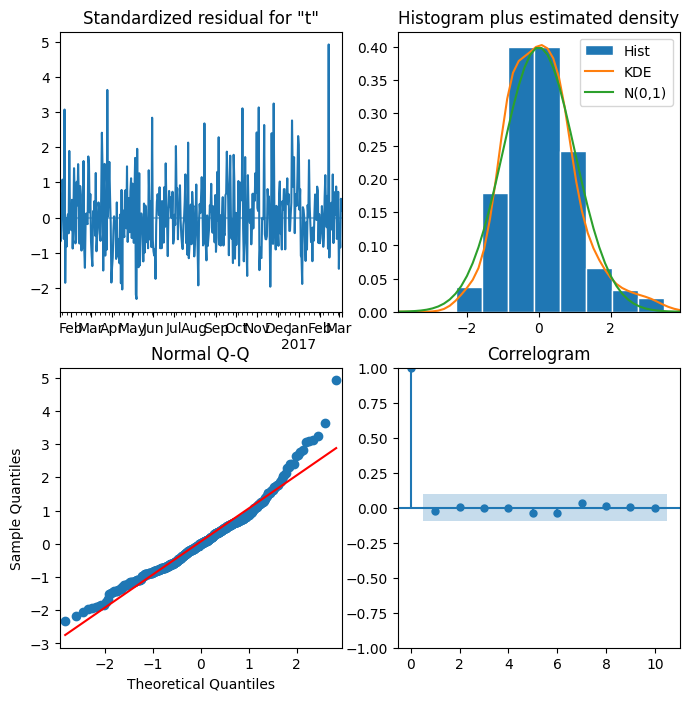

In [25]:
model.plot_diagnostics(figsize=(8,8));

Observation:-
- Standardized residual
 - mean = 0
 - variance is uniform
 - no obvious patterns

- Histogram plus KDE estimate
 - Normal distribution

- QQ Plot
 - Majority of the points lie on the straight line.

- Correlogram
 - more than 95% correlation coeff are not significant, since all values are within the confidence intervals.

<br>

> References (For interpreting the model diagnostics): 
- https://towardsdatascience.com/time-series-forecasting-with-arima-sarima-and-sarimax-ee61099e78f6
- https://www.jadsmkbdatalab.nl/forecasting-with-sarimax-models/


> Extra note:
- If the residuals are not normally distributed try to increase d.
- If the residuals are correlated try to increase p or q.
- d + D should not be greater than 2



MAE : 26.005
RMSE : 34.148
MAPE: 0.202


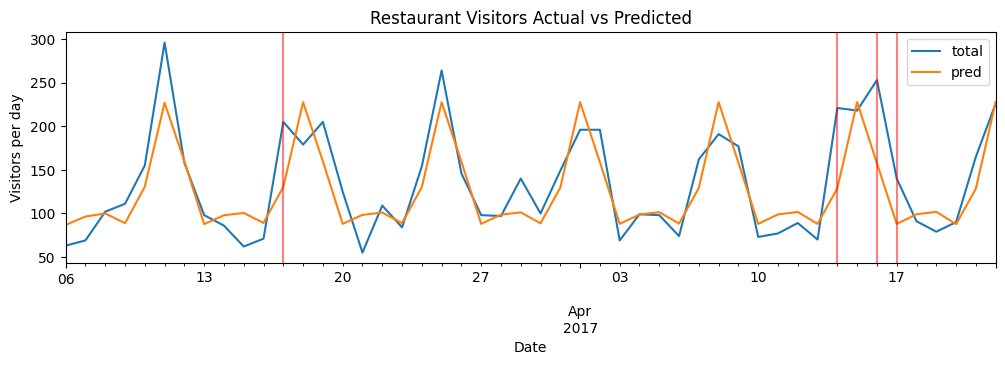

In [67]:
performance(test['total'], test['pred'])

# Plot predictions against known values
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel='Date'

ax = test[['total', 'pred']].plot(legend=True,figsize=(12,3),title=title)

ax.set(xlabel=xlabel, ylabel=ylabel)

# Adding vertical line for holidays
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

This is a very decent performance!

Note that the model predistions are missing the peaks many times. 

This means they have captured the seasonal component well, but as we saw before perhaps this can be improved if we include the information contained in the `holidays` column, during training.

#### 6. SARIMAX

In [69]:
# Obtain predicted values
start=len(train)
end=len(train)+len(test)-1

model = SARIMAX(train['total'],exog=train['holiday'],order=(1,0,2),seasonal_order=(1,2,2,7),enforce_invertibility=False)
results = model.fit()

exog_forecast = test[['holiday']]  # requires two brackets to yield a shape of (35,1)
predictions = results.predict(start=start, end=end, exog=exog_forecast).rename('Predictions')
# predictions

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [70]:
predictions.shape, test['pred'].shape

((48,), (48,))

In [71]:
test['pred'] = predictions

<ipython-input-71-c6f65a2c660d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['pred'] = predictions


MAE : 21.212
RMSE : 26.51
MAPE: 0.175


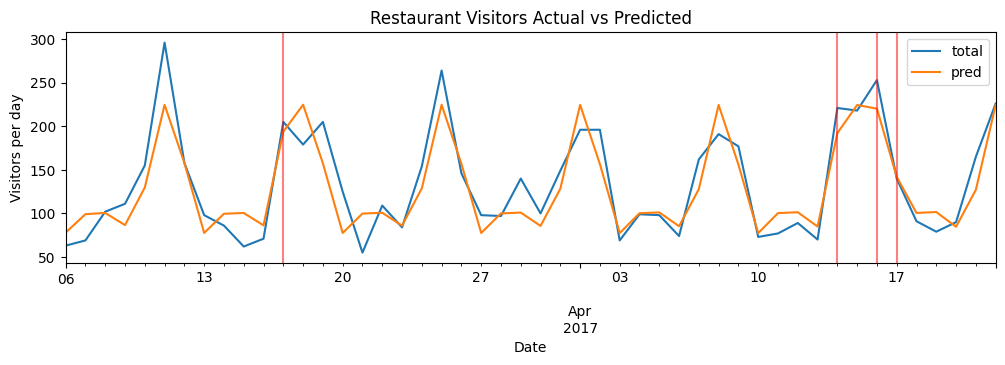

In [72]:
performance(test['total'], test['pred'])

# Plot predictions against known values
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel='Date'

ax = test[['total', 'pred']].plot(legend=True,figsize=(12,3),title=title)

ax.set(xlabel=xlabel, ylabel=ylabel)

# Adding vertical line for holidays
for x in test.query('holiday==1').index: 
    ax.axvline(x=x, color='red', alpha = 0.5);

- It can be observed that the predictions now are somewhat more closer to the peaks, for holidays.

- Observe the arrows.
Moreover, the peformace has also improved a lot.

---

So, we've found the best model with least error (17.5% MAPE): SARIMAX

Now let's actually forecast the unknown 39 values.

<br>

### Forecasting.

In [75]:
model = SARIMAX(df['total'],exog=df['holiday'],order=(1,0,2),seasonal_order=(1,2,2,7),enforce_invertibility=False)
results = model.fit()

exog_forecast = df1[478:][['holiday']] # because we dropped all NaNs from df
forecasts = results.predict(start=478, end=df1.shape[0]-1, exog=exog_forecast).rename('Forecasts')

/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.9/dist-packages/statsmodels/base/model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In order to visualise the forecasts, we will plot last 100 values of the dataframe, followed by the 42 forecasts.

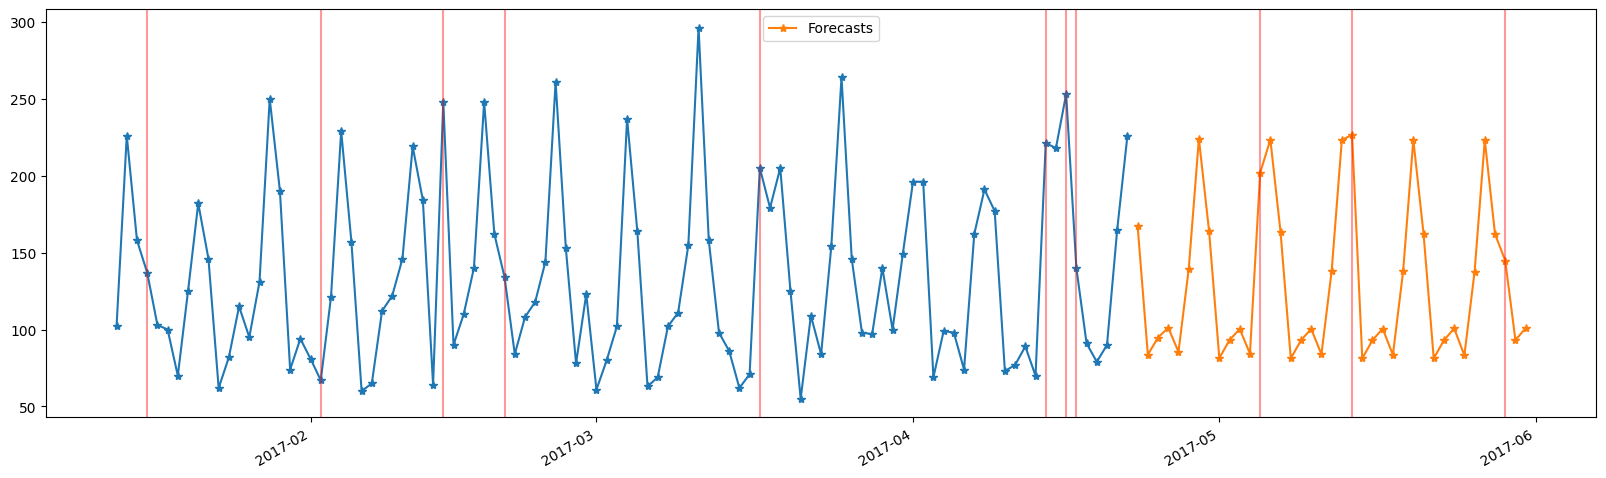

In [82]:
# Plot predictions against known values
title='Restaurant Visitors Actual vs Predicted'
ylabel='Visitors per day'
xlabel='Date'

plt.plot(df[-100:].index, df[-100:].total, '-*')
forecasts.plot(legend=True, style = '-*')

ax.set(xlabel=xlabel, ylabel=ylabel)

# Adding vertical line for holidays
for x in df[-100:].query('holiday==1').index: 
    plt.axvline(x=x, color='red', alpha = 0.4)

for x in df1[-42:].query('holiday==1').date: 
    plt.axvline(x=pd.to_datetime(x), color='red', alpha = 0.4)

In [83]:
df

,weekday,holiday,total
date,,,
2016-01-01,Friday,1,296.0
2016-01-02,Saturday,0,191.0
2016-01-03,Sunday,0,202.0
2016-01-04,Monday,0,105.0
2016-01-05,Tuesday,0,98.0
...,...,...,...
2017-04-18,Tuesday,0,91.0
2017-04-19,Wednesday,0,79.0
2017-04-20,Thursday,0,90.0


This solves our problem at hand!

<br>

Note:
- I chose not to use the `weekday` column as an exogenous variable, since it is only indicating to the seasonality trend.
- We already set $s=7$ in our SARIMA and SARIMAX models. 
- Even though I could've engineered the `weekday` col to make another column `is_weekend`, it would not have added much value.

---